<a href="https://colab.research.google.com/github/Pawan-kumar-Singh/Hotel_Booking-_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## Hotel Booking Analysis

### * Collection and Understanding of data*

Steps we are going to take to collect and understand this data set



1 Import important libraries.

2 Mount the google drive.

3 Exploration namely: head, tail, summary, data dictionary.

4 Find all the data description and information

5 Find null and duplicated values.

6 Explore all columns one by one and then find its meaning

In [216]:
#Importing the important library for EDA
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc

pd.options.display.max_columns = None


In [217]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [218]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
#importing the hotel booking data set using pandas read_csv function
df = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv')

In [220]:
# shape function return the total numbers of row and coloumns present in the data set
df.shape

(119390, 32)

So there is total 119390 rows and 32 columns

In [221]:
#lets check the numeric columns and categorical columns
numeric = ['int16','int32','int64','float16','float32','float64']
numeric_data = df.select_dtypes(include = numeric)
len(numeric_data.columns)

20

Now we know that in our data 20 columns are numeric

In [222]:
# Head function return the top 5 raw (records) of the data set
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [223]:
# tail function return below 5 records of data set
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [224]:
# info function give us brief information about the columns name its datatype and present of null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [225]:
# describe function give information about quantative data about its mean, standard deviation, total number of counts, data withs its percentile values
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [226]:
# nunique function return total number of unique values in columns
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [227]:
# finding the duplicate values
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

Here we cans see in our data we have 31994 duplicate values(true means duplicated valuse)

In [228]:
#hotel column contain two types of unique values Resort Hotel and City Hotel
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [229]:
# Combination of isnull function with sum function return the sum of count of null values in each columns
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [230]:
# Here we are checking the percentage of null values in columns
df.isna().sum().sort_values(ascending = False)/len(df)*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

Here we can see that comapny cloumns contains 94% of null values and agent columns contains 13% of null values

Country columns has 0.405 of missing values and children columns has 0.003% of missing valuse

In [231]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

hotel : The category of hotel, which are two resort hotel and city hotel.

is_cancelled : The valuen of column show the cancellation type. If the booking was cancelled or not values will 0 and 1. where 0 indicate not cancelled.

lead_time : The time between reservation and actual arrival.

arrival_date_year : Year of arrival date.

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date.

stayed_in_weekend_nights : The number of weekend night stay per reservation.

stayed_in_weekday_nights : The number of weekday night stay per reservation

adult : Number of adult.

children : Number of children.



babies : Number of babies.

meal : Meal preferences per reservation. [BB, FB, HB, SC, Undefine]

country : The origin country of guest.

market_segment :  The columns show reservation was made and what is the purpose of reservation e.g corporate means corporate trip, TA for travel agency.

distribution_channel : The medium through booking was made. [Direct, Corporate, TA/TO, Undefine, GDS]

is_repeated_guest : show if the guest is who has arrived earlier or not. values[0,1]. where 0 indicate no and 1 indicate yes person is repeated guest.

previous_cancellations : Number of previous booking that were cancelled by the customers prior to the cutomer current booking.

previous_booking_not_canceled : Number of previous booking not cancelled by the customer proir to the current booking.

reserved_room_type: Code of room type reserved.

assigned_room_type : Code for the type of room assigned to the booking was wntered on PMS until the moment of check_in or cancellation.

booking_changes : Number of changes made to the booking .

deposite_type : No Deposite, Non Refund, Refundable. 

agent :  ID of thettravel agency that made the bookings.

company : ID of the companythat make the booking.

days_in_waiting_list : Number of days bwtween actual booking and transact.

customer_type : Type of customer. Contract , Group, trnsiet, Transient party.

adr : Average Daily Rate as define by dividing the sum of all lodging transactin by the total nnumber of staing nights.

required_car_parking_spaces : number of car parking by the customers.

total_of_special_requests : Number of special requests made by the customers example twin bed or high floor

reservation_status : Reservation last status.

### Data Prepration and Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled.

Step 1: Remove duplicate or irrelevant observations

Remove unwanted observations from your dataset, including duplicate observations or irrelevant observations. Duplicate observations will happen most often during data collection.

Step 2: Fix structural errors

Structural errors are when you measure or transfer data and notice strange naming conventions, typos, or incorrect capitalization. These inconsistencies can cause mislabeled categories or classes. For example, you may find “N/A” and “Not Applicable” both appear, but they should be analyzed as the same category.

Step 3: Filter unwanted outliers

Often, there will be one-off observations where, at a glance, they do not appear to fit within the data you are analyzing. If you have a legitimate reason to remove an outlier, like improper data-entry, doing so will help the performance of the data you are working with.

Step 4: Handle missing data

You can’t ignore missing data because many algorithms will not accept missing values. There are a couple of ways to deal with missing data. Neither is optimal, but both can be considered.

As a first option, you can drop observations that have missing values, but doing this will drop or lose information, so be mindful of this before you remove it.
As a second option, you can input missing values based on other observations; again, there is an opportunity to lose integrity of the data because you may be operating from assumptions and not actual observations.
As a third option, you might alter the way the data is used to effectively navigate null values.

Step 5: Validate and QA

At the end of the data cleaning process, you should be able to answer these questions as a part of basic validation:

Does the data make sense?
Does the data follow the appropriate rules for its field?
Does it prove or disprove your working theory, or bring any insight to light?
Can you find trends in the data to help you form your next theory?
If not, is that because of a data quality issue?

In [232]:
# Removing the duplicated data from our data set
df.drop_duplicates(keep=False, inplace=True)

In [233]:
df.duplicated().value_counts()

False    79225
dtype: int64

Here we can see we have succesfully reomove all the duplicate data

In [234]:
# Fill null values with zero
df['company'].fillna(0, inplace= True)
df['agent'].fillna(0, inplace= True)
df['country'].fillna(0, inplace= True)
df['children'].fillna(0, inplace= True)

In [235]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Here we are successfully remove all the null values with zeros.

In [236]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Hotel column contain only two types of hotel Resort hotel and city hotel.

In [237]:
df['is_canceled'].unique()

array([0, 1])

is_canceled contain only true and false i.e 0 and 1

In [238]:
count_of_lead_time = df['lead_time'].unique()
len(count_of_lead_time)

437

There are 437 unique lead time.

In [239]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

data set contain data of the year 2015, 2016 and 2017.

In [240]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

arrival date month contain all month data jan to dec.

In [241]:
df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 18, 19, 10, 14])

minimum week end nights is 0 and maximum is 14.

In [242]:
df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 10, 11,  8,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 42, 50, 25, 17, 32, 26, 18, 34, 35,
       41])

In [243]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

minimum 0 adult and maximum 55 adults stayed .

In [244]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

minimum no of children is 0 and maxium 10.

In [245]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

minimum no of babies is 0 and maxium is 10.

In [246]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

there are 5 uniques meal one is undefined

In [247]:
count_of_country = df['country'].unique()
len(count_of_country)


176

there are 176 no of unique country.

In [248]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

7 types of market segment.

In [249]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

5 types of distribution channel one is undefined.

In [250]:
df['is_repeated_guest'].unique()

array([0, 1])

is repeated guest is either true or false.

In [251]:
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 25,  4,  5, 21,  6, 13, 11])

minimum previous cancellations is 0 and max is 21.

In [252]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [253]:
len(df['previous_bookings_not_canceled'].unique())

73

73 uniques cacellation values

In [254]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [255]:
len(df['reserved_room_type'].unique())

10

10 unique room type are availabel

In [256]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [257]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [258]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

3 types of depositev values

In [259]:
count_of_agents = df['agent'].unique()
len(count_of_agents)

322

322 uniques types of agent

In [260]:
count_of_company= df['company'].unique()
len(count_of_company)

341

341 uniques company are making the booking.

In [261]:
df['days_in_waiting_list'].unique()

array([  0,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34,  50, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  80,  59,  40,  89,
        53,  49,  58,  87,  69, 111,  63, 224,  31, 187, 176, 259, 236,
       207, 215,  30,  32,  27,  24, 108,  15,  96, 178, 330, 223, 193,
        10,  76,  16,  28,  21,   9, 165,  17,  25,  46,   7,  84, 175,
       183,  56,  23,  35, 117,  57,  12,  71,  54,  26,  73,  72,  98,
       147, 174, 162,  81,  68,  92,  74, 167,  36])

In [262]:
df['days_in_waiting_list'].unique().max()

330

max no of waiting is 330

In [263]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

4 types of customers.

In [264]:
df['adr'].unique()

array([  0.  ,  75.  , 107.  , ..., 266.75, 209.25, 157.71])

In [265]:
len(df['adr'].unique())

8721

maxmium average daily rate is 8721.

In [266]:
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

minimum 0 parking space and maximum 8 parking space

In [267]:
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [268]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

3 types of reservation state.

In [269]:
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-15',
       '2015-07-16', '2015-05-29', '2015-05-19', '2015-06-19',
       '2015-05-23', '2015-05-18', '2015-07-09', '2015-06-02',
       '2015-07-13', '2015-07-04', '2015-06-29', '2015-06-16',
       '2015-06-18', '2015-06-12', '2015-06-09', '2015-05-26',
       '2015-07-11', '2015-07-12', '2015-07-17', '2015-04-15',
       '2015-05-13', '2015-07-10', '2015-05-20', '2015-05-12',
       '2015-07-14', '2015-06-17', '2015-05-01', '2015-03-30',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

In [270]:
len(df['reservation_status_date'].unique())

922

922 days of booking data is availabel in 3 years.

After going through each column of data set now we can say there is not any structural errors

### Exploratory Analysis and Visulations

In [271]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [272]:
df['hotel'].value_counts()

City Hotel      47582
Resort Hotel    31643
Name: hotel, dtype: int64

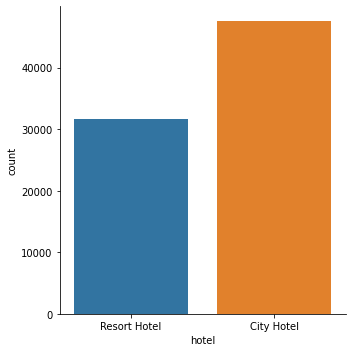

In [273]:
sns.catplot(x='hotel', kind='count', data=df)


Q. Describe hotel type

There are only teo type of hotel are present in our data set .Resort hotel and city hotel. Where 48k hotel are city hote type and 30k hotel are city hotel type. If we talk in percentage then in our data set we have 60 % data of city hotel and 39% data of resort hotel.

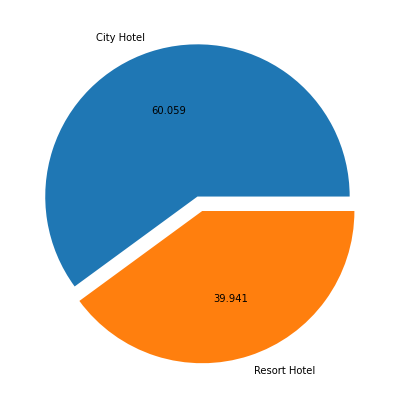

In [274]:
ind = df['hotel'].value_counts().index
val = df['hotel'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(val, labels=ind, autopct='%.3f', explode=(0,0.1))
plt.show()

In [275]:
df['is_canceled'].value_counts()

0    58452
1    20773
Name: is_canceled, dtype: int64

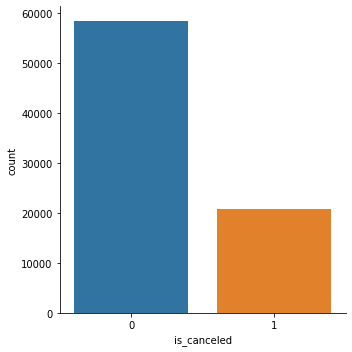

In [276]:
sns.catplot(x='is_canceled', kind='count', data=df)

Q. About guest booking cancelation.

In this data set approx 10 million guest making the booking out of which approx 58k thousand are not canceling there booking but still 20k guest were canceld there booking. if we talk about percentage 73% guest are not canceling there booking but 26% guest were canceled there booking.

([<matplotlib.patches.Wedge at 0x7fb22d173a50>,
 [Text(-0.7474352862780399, 0.80705668501442, ''),
  Text(0.747435361840137, -0.8070566150344742, '')],
 [Text(-0.4076919743334763, 0.4402127372805927, '73.780'),
  Text(0.4076920155491656, -0.4402126991097132, '26.220')])

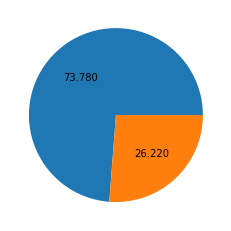

In [277]:
plt.pie(df['is_canceled'].value_counts(),autopct='%.3f')

In [278]:
df['arrival_date_month'].value_counts()

August       10465
July          9294
May           7489
April         7090
June          7057
March         6853
October       5995
September     5892
February      5641
December      4627
November      4498
January       4324
Name: arrival_date_month, dtype: int64

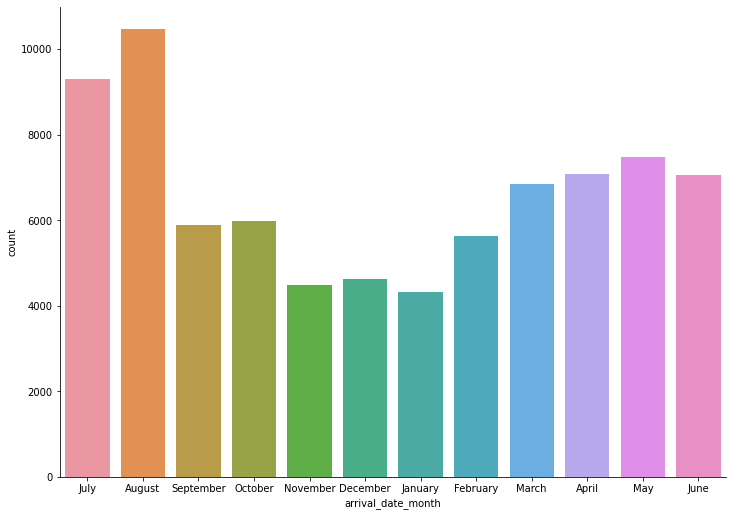

In [279]:

sns.catplot(x='arrival_date_month', kind='count',data=df,height=7.27, aspect=11.7/8.27)

Q. In which month of the year we have more number of guest?

During summer in the month of may, june, july and aguest we have more guest.
In the month of nov, dec nd jan we have very les no of guest.

In [280]:
df['adults'].value_counts()

2     58474
1     14559
3      5747
0       371
4        58
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

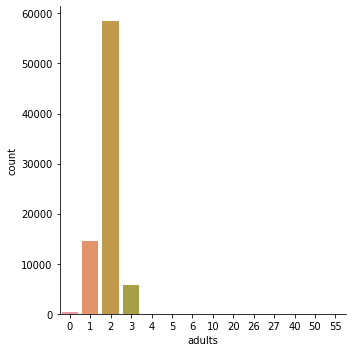

In [281]:
sns.catplot(x='adults', kind='count', data=df)

Q. How many adults are there in every booking of guest.

in this data set approx 59k guest have 2 adults , 15k guest have 1 guest and 5k guest have only 1 adults .

In [282]:
df['children'].value_counts()

0.0     71052
1.0      4559
2.0      3539
3.0        74
10.0        1
Name: children, dtype: int64

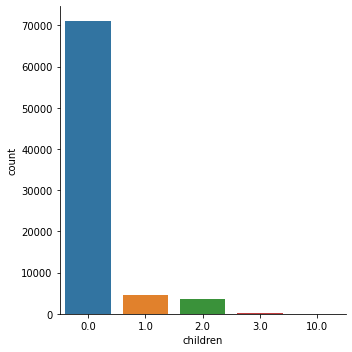

In [283]:
sns.catplot(x='children', kind='count', data=df)

Q. Number of children in the guest

72k guest have no children , 5k guest have 1 children and 5k guest have 2 childrens

In [284]:
df['babies'].value_counts()

0     78314
1       894
2        15
10        1
9         1
Name: babies, dtype: int64

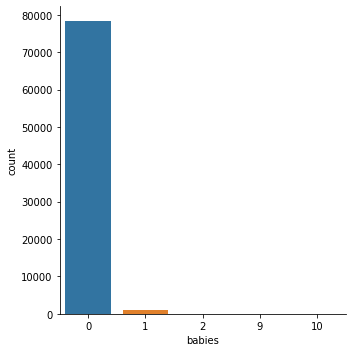

In [285]:
sns.catplot(x='babies', kind='count', data=df)

Q. Babies with the guest

aprox 90k guest dont have any babies only aprx 2k guest have babies.

In [286]:
df['meal'].value_counts()

BB           61845
SC            8703
HB            7997
Undefined      371
FB             309
Name: meal, dtype: int64

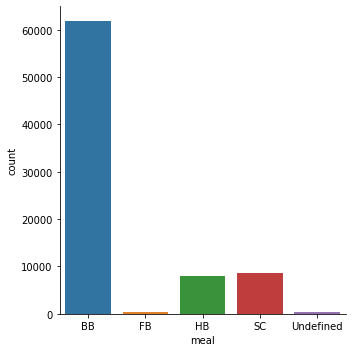

In [287]:
sns.catplot(x='meal', kind='count', data=df)

Q. Types of meal offered and what are most in demand.

offered meal are BB,SC,HB,FB and undefine. Meal which are most in demand are BB then SC then HB,FB and undefind 

In [288]:
df['arrival_date_year'].value_counts()

2016    38666
2017    28979
2015    11580
Name: arrival_date_year, dtype: int64

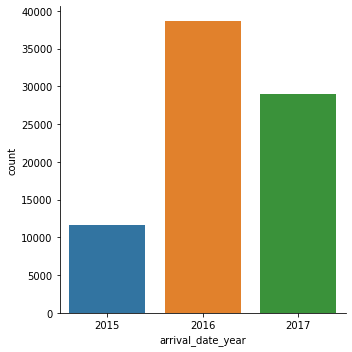

In [289]:
sns.catplot(x='arrival_date_year', kind='count', data=df)

Q. which year maxium guest visited?

In the year of 2016 most guest wisited then 2017 and 2015. If we describe in percentage then 48% guest visited in 2016 then 36% guest visited in 2017 and only 14% guest visited in year 2015.

([<matplotlib.patches.Wedge at 0x7fb22ce27ed0>,
 [Text(-1.0992253108954007, 0.04127609340659381, '2016'),
  Text(0.9670620028479203, -0.5242051913590413, '2017'),
  Text(0.48754820191698767, 0.9860510893495896, '2015')],
 [Text(-0.5995774423065822, 0.022514232767232984, '48.805'),
  Text(0.5274883651897746, -0.28593010437765887, '36.578'),
  Text(0.2659353828638114, 0.5378460487361397, '14.617')])

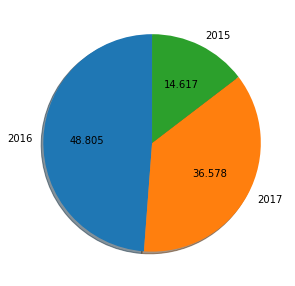

In [290]:
plt.figure(figsize=(5,5))
plt.pie(df['arrival_date_year'].value_counts(),startangle=90, autopct='%.3f',shadow=True,labels=['2016','2017','2015'])

In [291]:
df['reserved_room_type'].value_counts()

A    49971
D    16340
E     5745
F     2759
G     2016
C      904
B      889
H      592
L        6
P        3
Name: reserved_room_type, dtype: int64

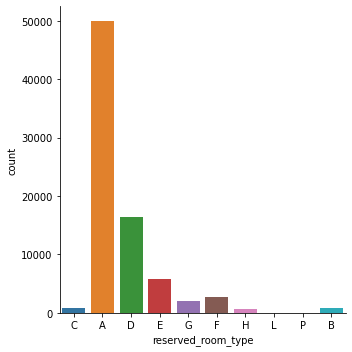

In [292]:
sns.catplot(x='reserved_room_type', kind='count', data=df)

Q.What type of room offered and what ae most in demand.

Room offered are A,B, C, D,E,F,G,H,L and P. A type room are most in demand folled by D,E,F,G. C,H,B are less in demand.

In [293]:
df['assigned_room_type'].value_counts()

A    40576
D    20867
E     6823
F     3524
G     2452
C     2070
B     1584
H      701
I      351
K      273
P        3
L        1
Name: assigned_room_type, dtype: int64

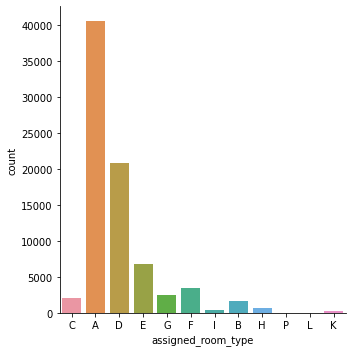

In [294]:
sns.catplot(x='assigned_room_type', kind='count', data=df)

Q. What are the room assigned to the guest ?

A room type are mmostly assigned to the guest followed by D,E,F,C and B. I,P,L,K are very less no of time assigned to the guest.

In [295]:
df['customer_type'].value_counts()

Transient          67404
Transient-Party     8413
Contract            2888
Group                520
Name: customer_type, dtype: int64

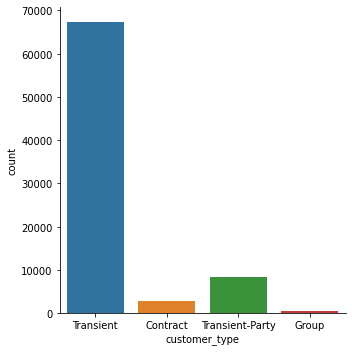

In [296]:
sns.catplot(x='customer_type', kind='count', data=df)

Q. what are the customer type ? which are mostly visit.

Transient, Contact, Transient-Party and group are the customer type in which Transient are highly visiting then Tansient_Party, Contract and then Group.

In [297]:
df['market_segment'].value_counts()

Online TA        48208
Offline TA/TO    12009
Direct           11201
Corporate         3821
Groups            3098
Complementary      668
Aviation           218
Undefined            2
Name: market_segment, dtype: int64

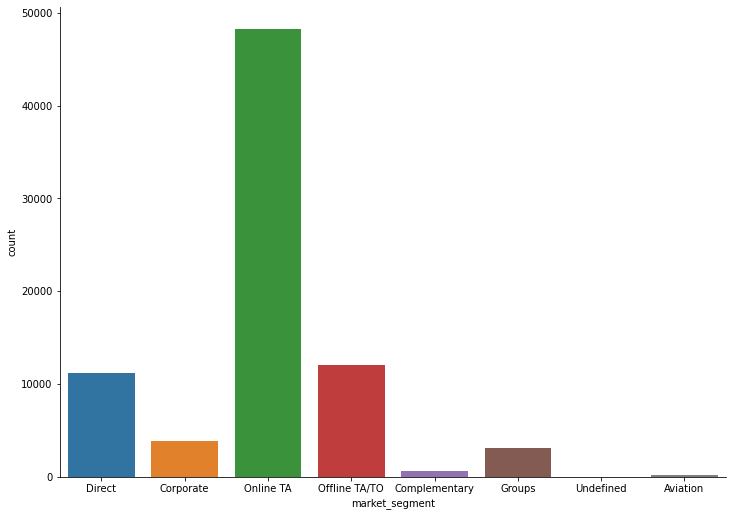

In [298]:
sns.catplot(x='market_segment', kind='count', data=df,height=7.27, aspect=11.7/8.27)

Q. What are the market segment?

Direct,corporate,Online TA, Office TA/To, complementry,Group,Undefined and Aviation are the narket segment in which Online TA market segment are most in number and Aviationa and undefined is almmost zero.

In [299]:
df['is_repeated_guest'].value_counts()

0    75897
1     3328
Name: is_repeated_guest, dtype: int64

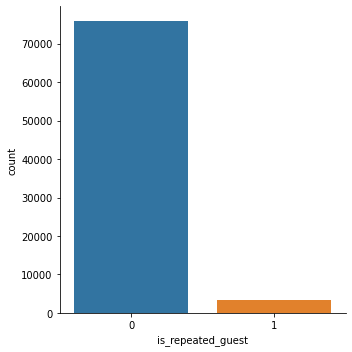

In [300]:
sns.catplot(x='is_repeated_guest', kind='count', data=df)

Q. Is the guest are revisited are new guest only.

More then75k guest are new visiter and only 5k is re-visiting.

In [301]:
df['previous_cancellations'].value_counts()

0     77949
1      1017
2       108
3        58
4        29
11       25
5        19
6        16
13        2
25        1
21        1
Name: previous_cancellations, dtype: int64

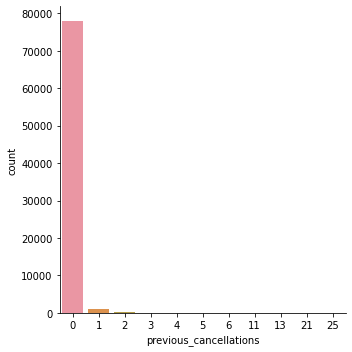

In [302]:
sns.catplot(x='previous_cancellations', kind='count',data=df)

Q. did the customer are canceling the booking ?

No only less then 1k approx guest are making prevous cancelation.

In [303]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [304]:
df['previous_bookings_not_canceled'].value_counts()

0     75727
1      1444
2       580
3       329
4       227
      ...  
47        1
49        1
50        1
51        1
72        1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64

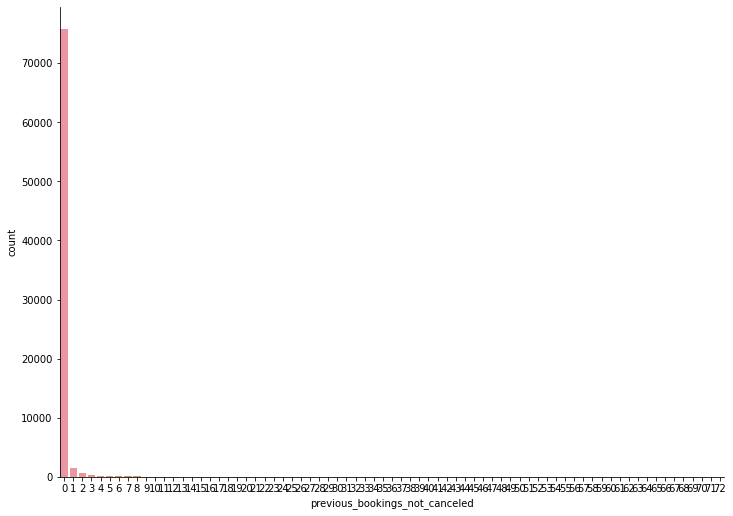

In [305]:
sns.catplot(x='previous_bookings_not_canceled', kind='count', data=df,height=7.27, aspect=11.7/8.27)

Q. How many guest are not canceling their booking?

More then 75k guest are not canceling there booking.

([<matplotlib.patches.Wedge at 0x7fb22d883b90>,
 [Text(-1.0894347143695313, 0.1520920876527705, ''),
  Text(1.0734489235999336, -0.24022366332679218, ''),
  Text(1.089253007684956, -0.15338802185724104, ''),
  Text(1.094073218085185, -0.11403417675735318, ''),
  Text(1.0963212974434104, -0.08988666626367528, ''),
  Text(1.0976320164908964, -0.07213845281213703, ''),
  Text(1.0983984167165737, -0.05933732513793063, ''),
  Text(1.0988324533765916, -0.050667932722588675, ''),
  Text(1.099124860428811, -0.043869592969920455, ''),
  Text(1.0993333709015007, -0.038290202693949324, ''),
  Text(1.099488602859029, -0.03353821973660029, ''),
  Text(1.0996036391956483, -0.02952688042592321, ''),
  Text(1.0996897063658622, -0.02612565239308055, ''),
  Text(1.0997552362982668, -0.02320388404004471, ''),
  Text(1.0998056949945798, -0.020674459061591405, ''),
  Text(1.0998437903283425, -0.018537445244302835, ''),
  Text(1.0998724752006415, -0.0167492774773945, ''),
  Text(1.0998952648499372, -0.01517

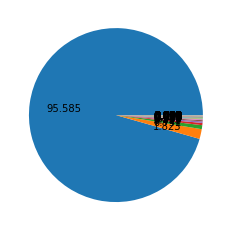

In [306]:
from pandas.io.pytables import annotations
plt.pie(df['previous_bookings_not_canceled'].value_counts(),autopct='%.3f')

In percentage we can see that 95% of customer are not canceling thier booking.

In [307]:
df['booking_changes'].value_counts()

0     64398
1     10067
2      3324
3       838
4       343
5       114
6        55
7        31
8        17
9         8
10        6
13        5
14        5
15        3
16        2
17        2
12        2
11        2
20        1
21        1
18        1
Name: booking_changes, dtype: int64

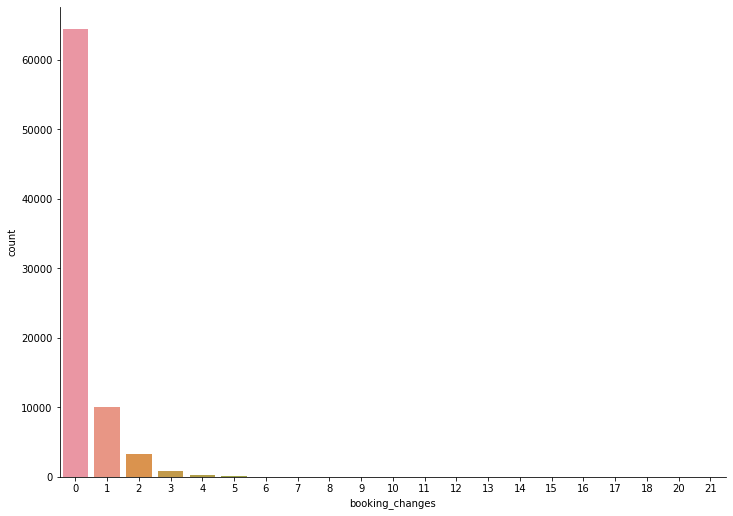

In [346]:
sns.catplot(x='booking_changes', kind='count', data=df,height=7.27, aspect=11.7/8.27)

Q Did the guest make changes in thier booking ?

65K guest are not making any changes but approx 10k guest were making changes in ther booking

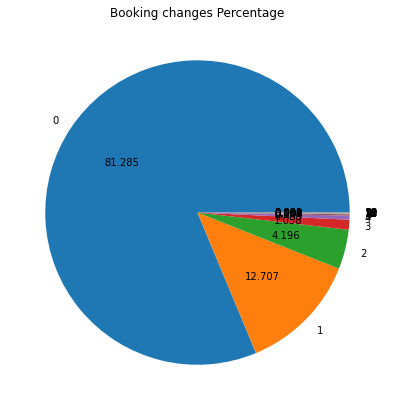

In [309]:
l1 = df['booking_changes'].value_counts().index
v1 = df['booking_changes'].value_counts().values

plt.figure(figsize=(7,7))
plt.pie(v1, labels = l1, autopct='%.3f')
plt.title('Booking changes Percentage')
plt.show()

81% are not making any changes 12% are making single type of changes 4% make two changes.

In [310]:
df['deposit_type'].value_counts()

No Deposit    78868
Non Refund      271
Refundable       86
Name: deposit_type, dtype: int64

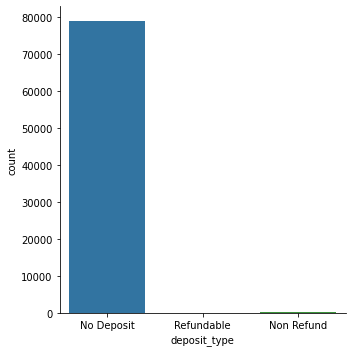

In [311]:
sns.catplot(x='deposit_type', kind='count', data=df )

Q. What are the deposite type offered?

approx 80k guest prefered no deposite very less are intredted in refundable and no refund.

([<matplotlib.patches.Wedge at 0x7fb22c46a750>,
 [Text(-1.099889777445945, 0.015571688087982434, ''),
  Text(1.0998302774216295, -0.01932254814100265, ''),
  Text(1.0999936032085793, -0.003751386437963689, '')],
 [Text(-0.5999398786068791, 0.008493648047990417, '99.549'),
  Text(0.5999074240481616, -0.01053957171327417, '0.342'),
  Text(0.5999965108410431, -0.00204621078434383, '0.109')])

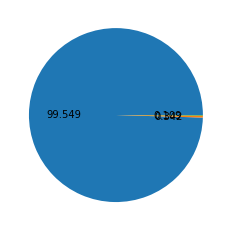

In [312]:
plt.pie(df['deposit_type'].value_counts(),autopct='%.3f')

99% prefered no deposite

In [313]:
df['required_car_parking_spaces'].value_counts()

0    71996
1     7196
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

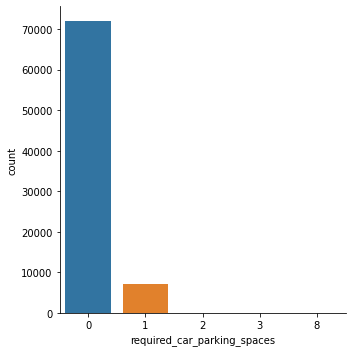

In [314]:
sns.catplot(x='required_car_parking_spaces', kind='count', data=df)

Q. guest ask for car parking ?

No, more then 70k guest are not asking for car parking approx 8k guest are looking for car parking.

In [315]:
df['reservation_status'].value_counts()

Check-Out    58452
Canceled     19836
No-Show        937
Name: reservation_status, dtype: int64

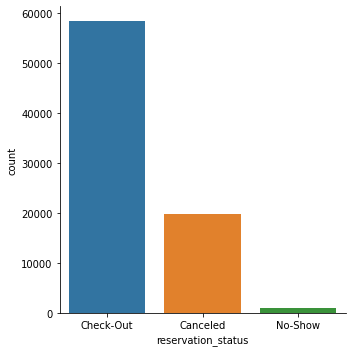

In [316]:
sns.catplot(x='reservation_status', kind='count', data=df)

Q. Is there any cancel reservation.

approx 59k guest checking out butapprox 19k guest were cancel reservation.

In [317]:
df['agent'].value_counts()

9.0      26565
240.0    12375
0.0      11120
14.0      3126
7.0       3111
         ...  
93.0         1
247.0        1
278.0        1
114.0        1
280.0        1
Name: agent, Length: 322, dtype: int64

agenet with id no 9.0 has make the maximum nuber of booking

In [318]:
df['company'].value_counts()

0.0      74483
40.0       788
223.0      414
45.0       228
153.0      198
         ...  
376.0        1
402.0        1
279.0        1
398.0        1
140.0        1
Name: company, Length: 341, dtype: int64

comapany with id no 0.0 has make the maximum booking

### bivariate analysis

In [319]:
df['hotel'].value_counts()

City Hotel      47582
Resort Hotel    31643
Name: hotel, dtype: int64

In [320]:
df['is_canceled'].value_counts()

0    58452
1    20773
Name: is_canceled, dtype: int64

In [321]:
hotel_cancelation_count= pd.DataFrame(df[['hotel','is_canceled']].value_counts()).reset_index()
hotel_cancelation_count.rename(columns = {0:'Count'}, inplace=True)
hotel_cancelation_count

,hotel,is_canceled,Count
0,City Hotel,0,33947
1,Resort Hotel,0,24505
2,City Hotel,1,13635
3,Resort Hotel,1,7138


In [322]:
per_cancel = hotel_cancelation_count[hotel_cancelation_count['hotel']=='City Hotel']['Count']
print('City Hotel No canceled : ', per_cancel[0]/per_cancel.sum()*100)
per_cancel = hotel_cancelation_count[hotel_cancelation_count['hotel']=='City Hotel']['Count']
print('City Hotel canceled : ', per_cancel[2]/per_cancel.sum()*100)
per_cancel = hotel_cancelation_count[hotel_cancelation_count['hotel']=='Resort Hotel']['Count']
print('Resort Hotel No canceled : ', per_cancel[1]/per_cancel.sum()*100)
per_cancel = hotel_cancelation_count[hotel_cancelation_count['hotel']=='Resort Hotel']['Count']
print('Resort Hotel No canceled : ', per_cancel[3]/per_cancel.sum()*100)

City Hotel No canceled :  71.34420579210627
City Hotel canceled :  28.65579420789374
Resort Hotel No canceled :  77.44208829756977
Resort Hotel No canceled :  22.557911702430236


As we can see customers who canceled city hotel are are more tend to cancel reservation with 28 % rather then 22% Reaort hotel.

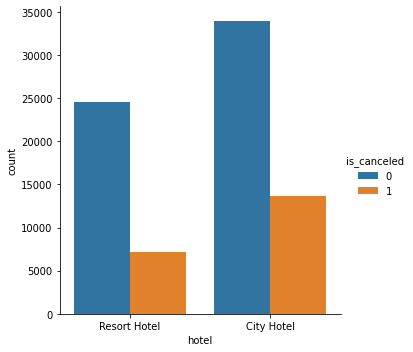

In [323]:
sns.catplot(x='hotel', kind='count', hue='is_canceled', data=df)

In [342]:
df['total_nights'] = df['stays_in_week_nights']+df['stays_in_weekend_nights']

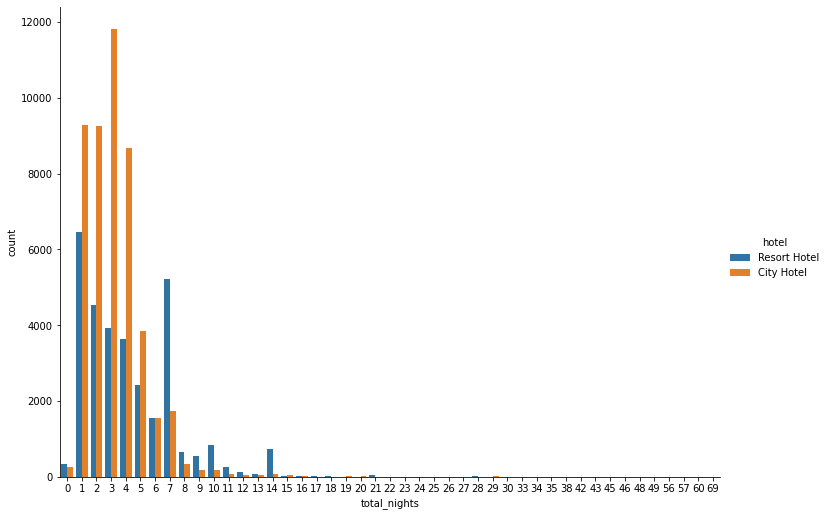

In [347]:
sns.catplot(x='total_nights', kind='count', hue='hotel', data=df,height=7.27, aspect=11.7/8.27)

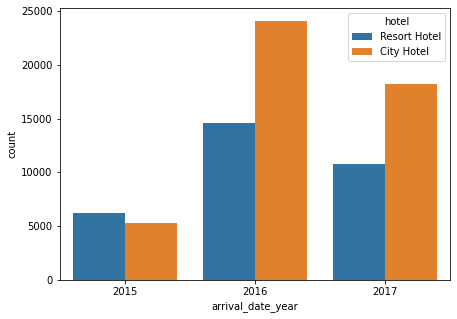

In [348]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df);

In [326]:
df[['children','babies','adults']] = df[['children','babies','adults']].astype('int64')

In [337]:
single=df[(df.adults==1) & (df.children==0) & (df.babies ==0)]
couple=df[(df.adults==2) & (df.children==0) & (df.babies ==0)]
family=df[(df.adults > 0) & (df.children > 0) & (df.babies > 0)]

names = ['single','couple(No children)', 'Family/Friends']
count = [single.shape[0],couple.shape[0],family.shape[0]]
count_percentage = [x/df.shape[0]*100 for x in count]

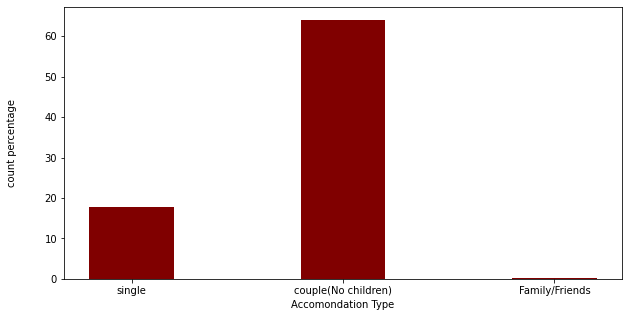

In [340]:
fig = plt.figure(figsize=(10,5))
#creating the bar plot
plt.bar(names,count_percentage,color='maroon',width=0.4)
plt.xlabel("Accomondation Type")
plt.ylabel("count percentage\n\n")
plt.show()

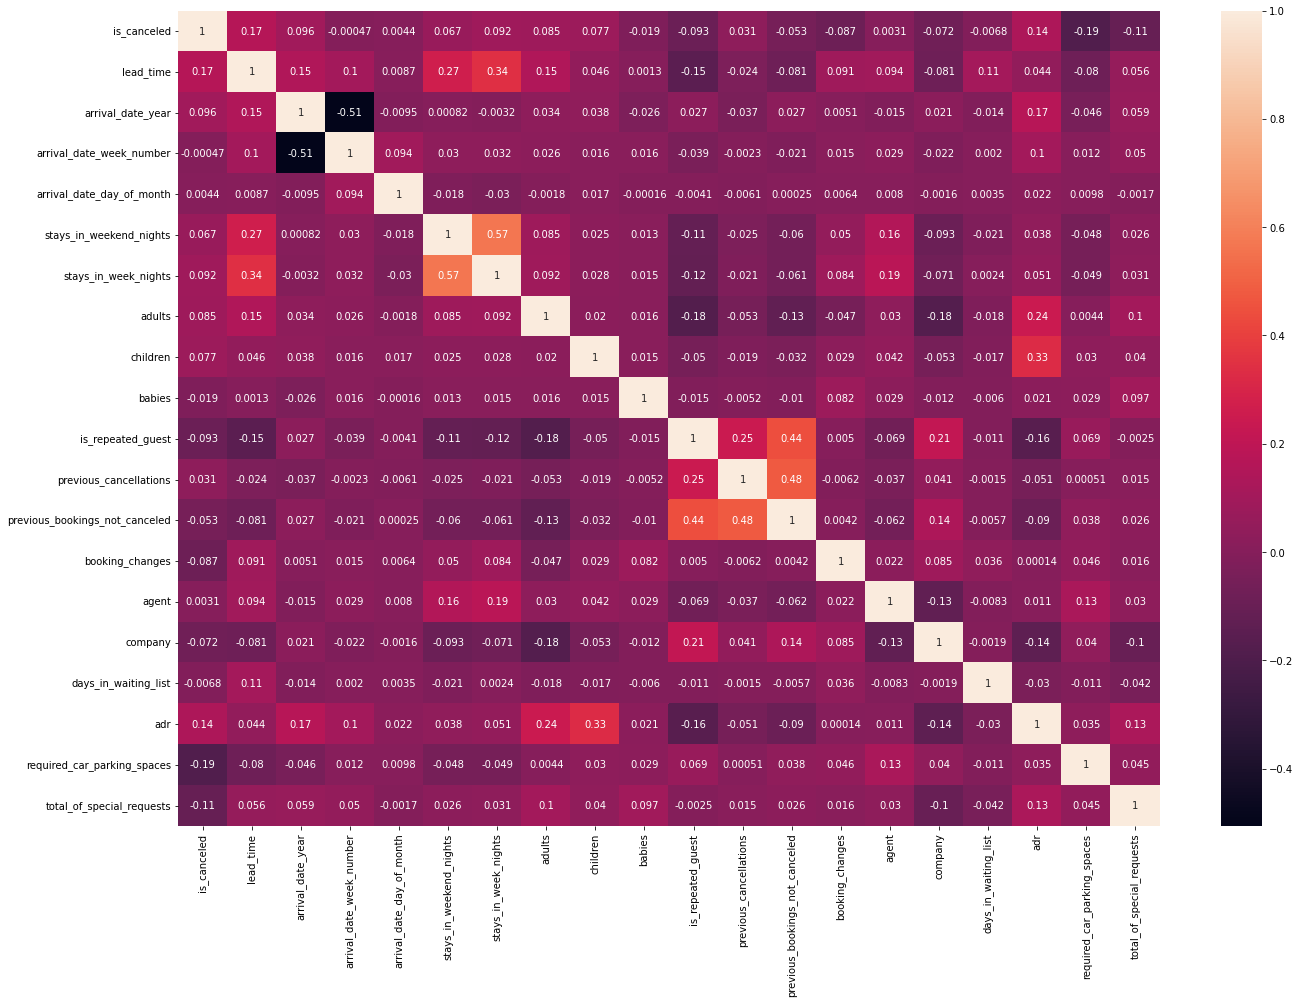

In [341]:
# Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df.corr(), annot=True, ax=ax);

## Question and Answer

how many bookig weher cancel?

### Summary and Conclusion